# Unsupervised exploration of the CaT stellar library

Data download: http://svocats.cab.inta-csic.es/catlib

#### ACKNOWLEDGMENT
This work is based on data from the CaT service developed by the Spanish Virtual Observatory in the framework of the IAU Comission G5 Working Group : Spectral Stellar Libraries.

## Data overview

In [1]:
from astropy.io import fits
import matplotlib.pylab as plt
import numpy as np

In [2]:
file = "/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan406.fits"

sp = fits.open(file)
print('\n\nHeader of the spectrum :\n\n', sp[0].header, '\n\n')

flux2 = np.zeros(sp[0].header['NAXIS1'], dtype=float)
flux2 = np.array(sp[0].data)
flux_norm = flux2/(np.nanmax(flux2))

wave2 = np.ones(sp[0].header['NAXIS1'], dtype=float)
for i in range(sp[0].header['NAXIS1']):
    wave2[i] = sp[0].header['CRVAL1'] + i*sp[0].header['CDELT1']



Header of the spectrum :

 SIMPLE  =                    T / file does conform to FITS standard             BITPIX  =                  -32 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                  790 / length of data axis 1                          NAXIS2  =                    1 / length of data axis 2                          COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy andCOMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.COMMENT   Contact the NASA Science Office of Standards and Technology for the   COMMENT   FITS Definition document #100 and other FITS information.             COMMENT   ----------------------------------------------------------------------COMMENT   ************************** REDUCEME HEADER ***************************COMMENT   ----------------------------------------------------------------------HISTORY   D

In [3]:
flux_ok = np.reshape(flux_norm, (sp[0].header['NAXIS1']))

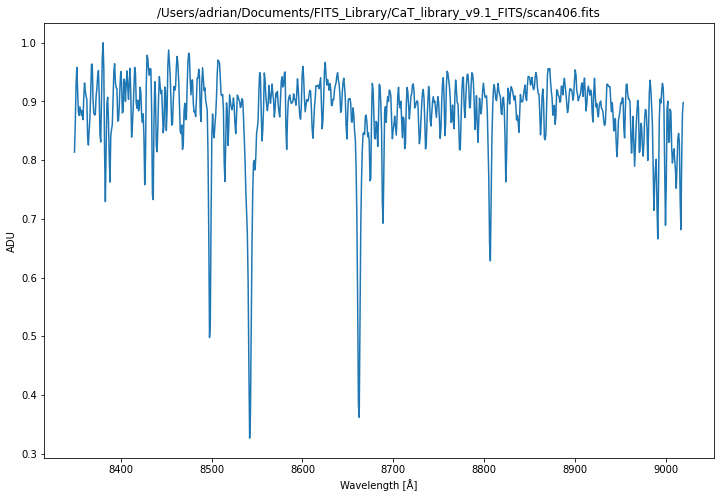

In [4]:
fig = plt.figure(1, figsize=(12, 8))
plt.plot(wave2, flux_ok)
plt.xlabel('Wavelength [Å]')
plt.ylabel('ADU')
plt.title(file)
plt.show()

## Comparative analysis

In [5]:
import os
from fnmatch import fnmatch
from pathlib import Path

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

## Creating the dataset

In [7]:
root = '/Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS'

In [8]:
num = 1
dim1 = sp[0].header['NAXIS1']
for path, subdirs, files in os.walk(root):
    for nanme in files:
        num += 1
print(num)
print(dim1)

707
790


In [9]:
curves = 0
custom_set = np.zeros((num, dim1))
label_set = np.zeros((num, ), dtype=int)
spectra_set = [''] * num
objects = []
for path, subdirs, files in os.walk(root):
    for name in files:
        file = [os.path.join(path, name)]
        str = " " 
        Ffile = (str.join(file))
        route = Path(name)
        Fname = route.with_suffix('')
        Fpng = route.with_suffix('.png')

        data, header = fits.getdata(Ffile, header=True)
        hdu_number = 0
        fits.getheader(Ffile, hdu_number)
        fits_file = Ffile
        
        with fits.open(fits_file, mode='readonly') as hdulist:
            hdulist.info()
            data = np.array(hdulist[0].data)
             
            data_norm = np.reshape(data/(np.nanmax(data)), (sp[0].header['NAXIS1']))
                
            objects.append(sp[0].header['OBJECT'])
            label_set[curves] = curves
            spectra_set[curves] = name
            for i in range (dim1):
                custom_set[curves,i] = (data_norm[i])
        hdulist.close   
        curves += 1
   
            
#--------------------------------------------------------------------
        print ("Spectrum loaded:",curves+1, "spectra");

Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan446.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 2 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan016.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 3 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan503.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 4 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan153.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 5 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v

Spectrum loaded: 36 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan610.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 37 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan485.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 38 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan190.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 39 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan313.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 40 spectra
Filename: /Users/adrian/Docu

Spectrum loaded: 71 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan077.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 72 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan309.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 73 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan165.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 74 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan535.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 75 spectra
Filename: /Users/adrian/Docu

Spectrum loaded: 106 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan076.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 107 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan518.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 108 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan148.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 109 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan261.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 110 spectra
Filename: /Users/adrian

Spectrum loaded: 141 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan492.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 142 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan168.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 143 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan187.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 144 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan703.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 145 spectra
Filename: /Users/adrian

Spectrum loaded: 176 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan335.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 177 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan159.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 178 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan509.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 179 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan227.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 180 spectra
Filename: /Users/adrian

Spectrum loaded: 211 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan437.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 212 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan440.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 213 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan010.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 214 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan505.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 215 spectra
Filename: /Users/adrian

Spectrum loaded: 246 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan303.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 247 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan246.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 248 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan616.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 249 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan483.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 250 spectra
Filename: /Users/adrian

Spectrum loaded: 281 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan210.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 282 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan139.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 283 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan093.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 284 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan569.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 285 spectra
Filename: /Users/adrian

Spectrum loaded: 316 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan174.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 317 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan461.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 318 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan031.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 319 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan318.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 320 spectra
Filename: /Users/adrian

Spectrum loaded: 351 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan570.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 352 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan659.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 353 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan209.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 354 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan198.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 355 spectra
Filename: /Users/adrian

Spectrum loaded: 386 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan272.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 387 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan205.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 388 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan655.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 389 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan340.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 390 spectra
Filename: /Users/adrian

Spectrum loaded: 421 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan546.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 422 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan116.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 423 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan403.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 424 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan053.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 425 spectra
Filename: /Users/adrian

Spectrum loaded: 456 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan394.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 457 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan140.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 458 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan510.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 459 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan005.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 460 spectra
Filename: /Users/adrian

Spectrum loaded: 491 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan361.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 492 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan224.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 493 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan674.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 494 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan418.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 495 spectra
Filename: /Users/adrian

Spectrum loaded: 526 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan571.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 527 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan203.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 528 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan653.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 529 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan346.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 530 spectra
Filename: /Users/adrian

Spectrum loaded: 561 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan540.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 562 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan110.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 563 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan405.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 564 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan055.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 565 spectra
Filename: /Users/adrian

Spectrum loaded: 596 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan560.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 597 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan130.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 598 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan219.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 599 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan649.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 600 spectra
Filename: /Users/adrian

Spectrum loaded: 631 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan326.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 632 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan263.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 633 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan633.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 634 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan218.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 635 spectra
Filename: /Users/adrian

Spectrum loaded: 666 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan412.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 667 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan691.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 668 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan384.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 669 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan541.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 670 spectra
Filename: /Users/adrian

Spectrum loaded: 701 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan310.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 702 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan594.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 703 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan081.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 704 spectra
Filename: /Users/adrian/Documents/FITS_Library/CaT_library_v9.1_FITS/scan202.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      20   (790, 1)   float32   
Spectrum loaded: 705 spectra
Filename: /Users/adrian

In [10]:
label_set = np.asarray(label_set)

In [11]:
dataset = tf.data.Dataset.from_tensor_slices((custom_set, label_set))
dataset.element_spec

2024-02-27 23:21:22.136997: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(TensorSpec(shape=(790,), dtype=tf.float64, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [12]:
x_train,x_test,y_train,y_test=train_test_split(custom_set,label_set,test_size=0.2,random_state=123)

## VAE

In [13]:
class Sampling(layers.Layer):
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim), mean=0., stddev=0.1)
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [14]:
vae = tf.keras.models.load_model('CaT_VAE.tf')

In [15]:
vae_encoder = tf.keras.models.load_model('CaT_6DVAE_Encoder-augmented.tf')

In [16]:
vae_decoder = tf.keras.models.load_model('CaT_6DVAE_Decoder-augmented.tf')

In [17]:
vae.load_weights('CaT_VAE_Weights')

In [18]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
vae.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())

In [19]:
vae_decoded_imgs = vae(custom_set).numpy()       

In [20]:
vae_decoded_imgs.shape

(707, 790)

In [21]:
vae_r2 = []
for i in range(len(vae_decoded_imgs)):
    vae_r2.append(r2_score(custom_set[i], vae_decoded_imgs[i], multioutput='variance_weighted'))

In [22]:
print("Max r2: ", max (vae_r2))
print("Min r2: ", min (vae_r2))

Max r2:  0.9911298583812631
Min r2:  -0.38552291381137604


VAE results for  HD124186
R2=  0.9620563117264092


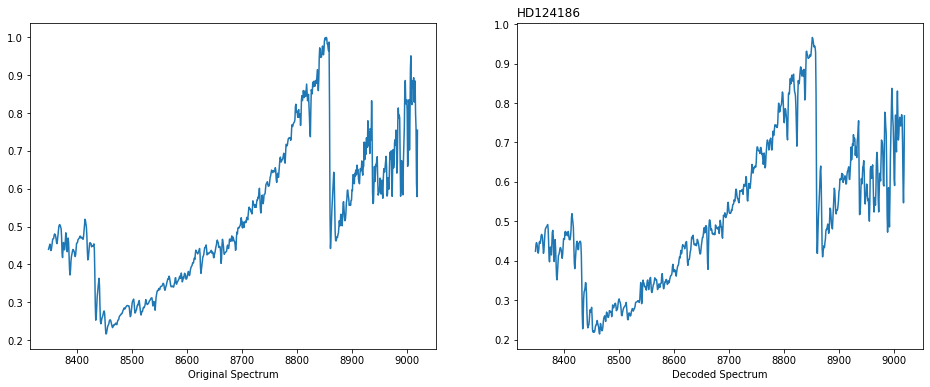

In [23]:
figure =665
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plt.title(objects[figure], loc='left')
ax[0].plot(wave2, custom_set[figure])
ax[0].set_xlabel('Original Spectrum')   
ax[1].plot(wave2, vae_decoded_imgs[figure])
ax[1].set_xlabel('Decoded Spectrum')
print("VAE results for ", objects[figure])
print("R2= ", vae_r2[figure])

## Six-layer Sparse Autoencoder

In [24]:
Six_autoencoder = tf.keras.models.load_model('6layers_6dim_CaT_autoencoder.tf')

In [25]:
Six_encoded_imgs = Six_autoencoder.encoder(custom_set).numpy()
Six_decoded_imgs = Six_autoencoder.decoder(Six_encoded_imgs).numpy()

In [26]:
Six_decoded_imgs.shape

(707, 790)

In [27]:
Six_r2 = []
for i in range(len(Six_decoded_imgs)):
    Six_r2.append(r2_score(custom_set[i], Six_decoded_imgs[i], multioutput='variance_weighted'))

In [28]:
print("Max r2: ", max (Six_r2))
print("Min r2: ", min (Six_r2))

Max r2:  0.916352780753044
Min r2:  -30.820112112807443


VAE results for  HD124186
R2=  -3.7181386535792527


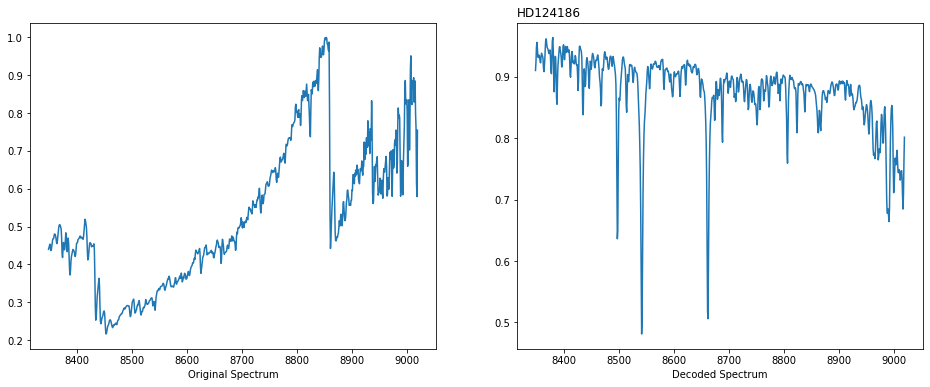

In [29]:
figure =665
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plt.title(objects[figure], loc='left')
ax[0].plot(wave2, custom_set[figure])
ax[0].set_xlabel('Original Spectrum')   
ax[1].plot(wave2, Six_decoded_imgs[figure])
ax[1].set_xlabel('Decoded Spectrum')
print("VAE results for ", objects[figure])
print("R2= ", Six_r2[figure])

## Two-layer Sparse Autoencoder

In [30]:
Two_autoencoder = tf.keras.models.load_model('2layers_6dim_CaT_autoencoder.tf')

In [31]:
Two_encoded_imgs = Two_autoencoder.encoder(custom_set).numpy()
Two_decoded_imgs = Two_autoencoder.decoder(Two_encoded_imgs).numpy()

In [32]:
Two_decoded_imgs.shape

(707, 790)

In [33]:
Two_r2 = []
for i in range(len(Two_decoded_imgs)):
    Two_r2.append(r2_score(custom_set[i], Two_decoded_imgs[i], multioutput='variance_weighted'))

In [34]:
print("Max r2: ", max (Two_r2))
print("Min r2: ", min (Two_r2))

Max r2:  0.9934283640895617
Min r2:  0.0


VAE results for  HD124186
R2=  0.9903930467127161


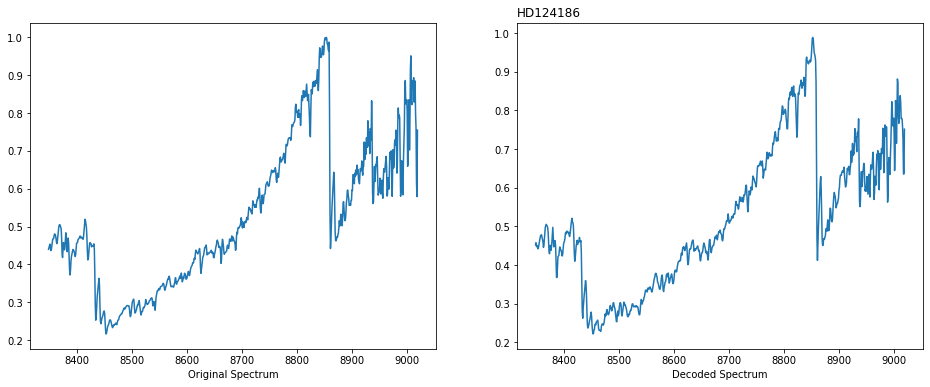

In [35]:
figure =665
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plt.title(objects[figure], loc='left')
ax[0].plot(wave2, custom_set[figure])
ax[0].set_xlabel('Original Spectrum')   
ax[1].plot(wave2, Two_decoded_imgs[figure])
ax[1].set_xlabel('Decoded Spectrum')
print("VAE results for ", objects[figure])
print("R2= ", Two_r2[figure])

## Results by model

In [36]:
import pandas as pd
import seaborn as sns

In [37]:
vae_r2_ok = [vae_r2 for value in vae_r2 if vae_r2 != 0]
Six_r2_ok = [Six_r2 for value in Six_r2 if Six_r2 != 0]
Two_r2_ok = [Two_r2 for value in Two_r2 if Two_r2 != 0]

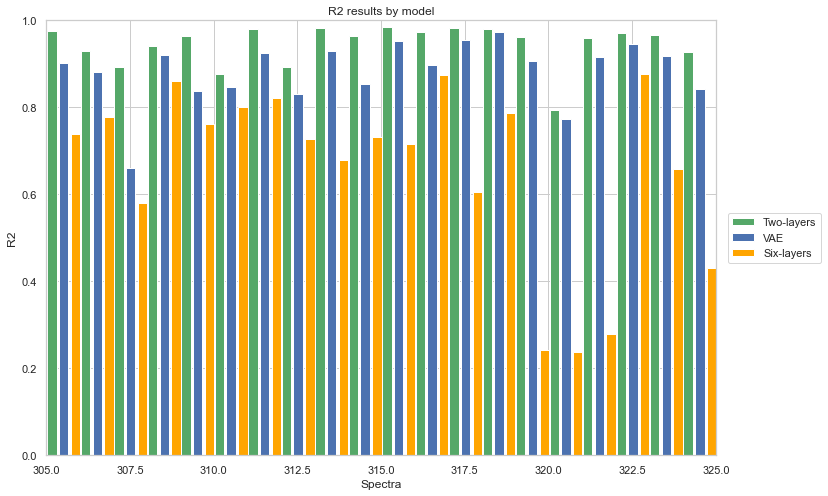

In [76]:
x = np.arange(len(label_set))
width = 0.35

fig, ax = plt.subplots(1, figsize=(12, 8))

rects1 = ax.bar(x + width/2, Two_r2, 0.8*width, label='Two-layers', color='g')
rects2 = ax.bar(x + 3*width/2, vae_r2, 0.8*width, label='VAE')
rects3 = ax.bar(x + 5*width/2, Six_r2, 0.8*width, label='Six-layers', color='orange')

ax.set_ylabel('R2')
ax.set_xlabel('Spectra')
ax.set_title('R2 results by model')
ax.set_xlim([305, 325])
ax.set_ylim([0, 1])

ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width , box.height])
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
fig.savefig("Autoencoder comparative2.png") 

plt.show()

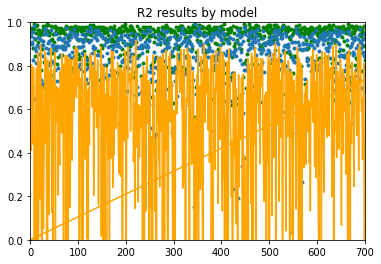

In [41]:
plt.title('R2 results by model')

fig3 = plt.figure(1, figsize=(12, 8))
plt.plot(label_set, Two_r2,'g.')
plt.plot(label_set, vae_r2,'.')
plt.plot(label_set, Six_r2,'orange')

plt.axis([0, 700, 0, 1])
sns.color_palette("icefire", as_cmap=True)

plt.show()

In [42]:
data_r2 = np.array([Two_r2, vae_r2, Six_r2])
data_r2[0][0] == Two_r2[0]

True

In [43]:
data_r2[0]

array([0.96316586, 0.96936253, 0.97496954, 0.95694711, 0.96155421,
       0.70310831, 0.97623592, 0.88304647, 0.96761257, 0.99342836,
       0.84706448, 0.92216799, 0.98153199, 0.94952122, 0.98661554,
       0.66048819, 0.96315598, 0.91060187, 0.96515175, 0.94340644,
       0.95589428, 0.94197914, 0.95716698, 0.78224749, 0.89360919,
       0.87854245, 0.98249097, 0.96729039, 0.94870355, 0.81670076,
       0.96497016, 0.98432951, 0.97857054, 0.9666732 , 0.9659319 ,
       0.7746377 , 0.9911277 , 0.98585654, 0.96139883, 0.94329147,
       0.94954726, 0.81285503, 0.96091498, 0.91774294, 0.98413983,
       0.9212205 , 0.86137084, 0.98009695, 0.94833816, 0.90798998,
       0.87882002, 0.94552182, 0.9838159 , 0.88361529, 0.97413125,
       0.96145187, 0.80668887, 0.94886636, 0.97613273, 0.84169649,
       0.92876856, 0.9293344 , 0.95171254, 0.96229989, 0.97607323,
       0.96719964, 0.84792198, 0.96667243, 0.89136456, 0.9551772 ,
       0.77225831, 0.95290033, 0.96964317, 0.91087919, 0.94505

In [44]:
data_r2.shape

(3, 707)

## Three model R-square results

In [45]:
sns.set_theme(style="whitegrid")
data = pd.DataFrame({'Two-layers': data_r2[0, :], 'VAE': data_r2[1, :], 'Six-layers': data_r2[2, :]})
print(dataset)

<TensorSliceDataset element_spec=(TensorSpec(shape=(790,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


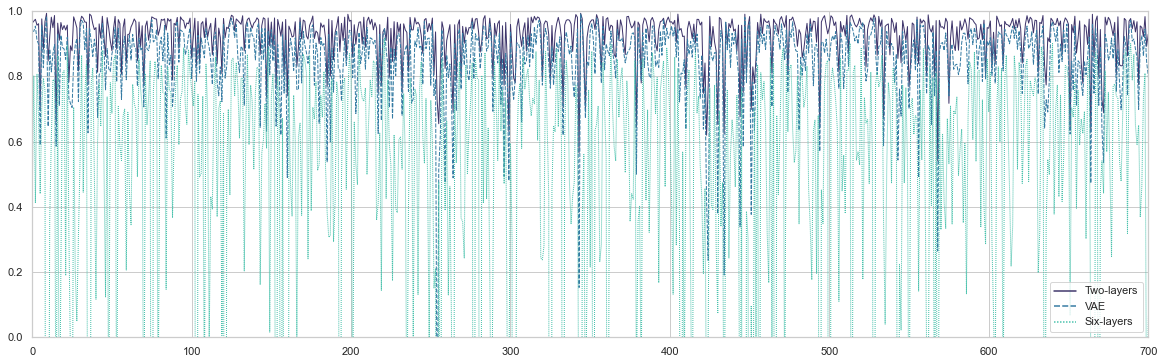

In [58]:
fig = plt.figure(1, figsize=(20, 6))

dataset = data.rolling(100).mean()
plt.axis([0, 700, 0, 1])

sns.lineplot(data=data, palette="mako", linewidth=1)

fig.savefig("Autoencoder comparative.png") 


## Original (green-up), 2-layer (blue), VAE (orange), and 6-layer (red) decoded spectra

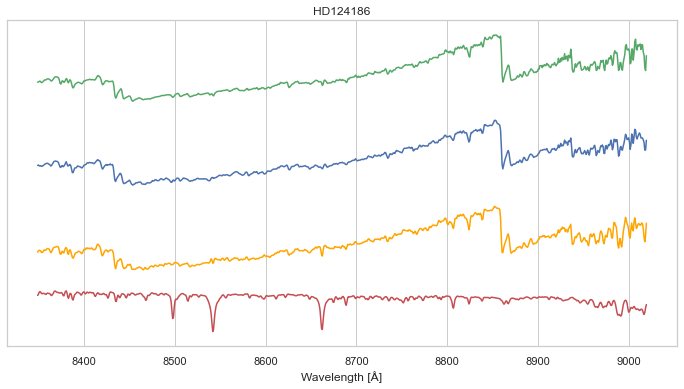

In [59]:
figure = 665
fig = plt.figure(1, figsize=(12, 6))
plt.plot(wave2, 3+custom_set [figure],'g')
plt.plot(wave2, 2+Two_decoded_imgs[figure])
plt.plot(wave2, 1+vae_decoded_imgs[figure], 'orange')
plt.plot(wave2, Six_decoded_imgs[figure], 'r')

sns.color_palette("mako", as_cmap=True)

plt.yticks([])

plt.xlabel('Wavelength [Å]')
plt.title(objects[figure])
plt.legend
fig.savefig("Autoencoder spectra.png") 

plt.show()

## Original (green) vs 2-layer decoded (blue) spectra

VAE results for  HD124186
R2=  0.9903930467127161


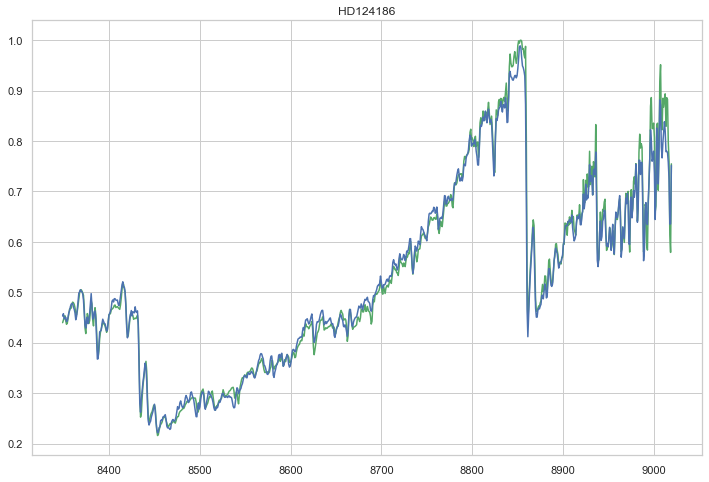

In [49]:
fig = plt.figure(1, figsize=(12, 8))
plt.title(objects[figure])

plt.plot(wave2, custom_set[figure], 'g')
plt.plot(wave2, Two_decoded_imgs[figure], 'b')
print("VAE results for ", objects[figure])
print("R2= ", Two_r2[figure])